In [5]:
import folium
import pandas as pd
saitama_data = pd.read_csv('/importfilepath.csv',encoding = "UTF-8")#インポートファイルのパス
saitama_data['code'] = saitama_data['code'].astype('str')
geojson = '/filepath.json' #Jsonファイルのパス
saitama_location = [35.932449, 139.400991] #マップの初期表示位置
m = folium.Map(location=saitama_location,tiles='cartodbpositron',zoom_start=9) 
m.choropleth(geo_data=geojson,
             name='choropleth',
             data=saitama_data,
             columns=['code', 'npatients'],
             key_on='feature.id',
             line_color = 'black',
             fill_color ="PuRd",
             threshold_scale=[0,5,10,25,50,75,100,125,150],
             fill_opacity=0.7,
             line_opacity=0.2,
             legend_name="COVID-19 patients May 7th")

datasize = len(saitama_data['code'])
for i in range(datasize):
    pin = [saitama_data['lat'][i], saitama_data['lon'][i]] #pinに緯度と経度をいれる
    if saitama_data['npatients'][i] >125:
        folium.Marker(pin, popup=[saitama_data['city_name'][i],"pt:"+str(saitama_data['npatients'][i]),"male:"+str(saitama_data["male"][i]),"female:"+str(saitama_data["female"][i])],
        icon=folium.Icon(color="darkpurple",icon = "user")).add_to(m)
    elif 125>= saitama_data['npatients'][i] >100:
        folium.Marker(pin, popup=[saitama_data['city_name'][i],"pt:"+str(saitama_data['npatients'][i]),"male:"+str(saitama_data["male"][i]),"female:"+str(saitama_data["female"][i])],
        icon=folium.Icon(color="purple",icon = "user")).add_to(m)
    elif 100 >= saitama_data['npatients'][i]> 75:
        folium.Marker(pin, popup=[saitama_data['city_name'][i],"pt:"+str(saitama_data['npatients'][i]),"male:"+str(saitama_data["male"][i]),"female:"+str(saitama_data["female"][i])],
        icon=folium.Icon(color="darkred",icon = "user")).add_to(m)
    elif 75>= saitama_data['npatients'][i] >50:
        folium.Marker(pin, popup=[saitama_data['city_name'][i],"pt:"+str(saitama_data['npatients'][i]),"male:"+str(saitama_data["male"][i]),"female:"+str(saitama_data["female"][i])],
        icon=folium.Icon(color="red",icon = "user")).add_to(m)
    elif 50>= saitama_data['npatients'][i] >25:
        folium.Marker(pin, popup=[saitama_data['city_name'][i],"pt:"+str(saitama_data['npatients'][i]),"male:"+str(saitama_data["male"][i]),"female:"+str(saitama_data["female"][i])],
        icon=folium.Icon(color="red",icon = "user")).add_to(m)
    elif 25>= saitama_data['npatients'][i] >10:
        folium.Marker(pin, popup=[saitama_data['city_name'][i],"pt:"+str(saitama_data['npatients'][i]),"male:"+str(saitama_data["male"][i]),"female:"+str(saitama_data["female"][i])],
        icon=folium.Icon(color="orange",icon = "user")).add_to(m)
    elif 10>= saitama_data['npatients'][i] >5:
        folium.Marker(pin, popup=[saitama_data['city_name'][i],"pt:"+str(saitama_data['npatients'][i]),"male:"+str(saitama_data["male"][i]),"female:"+str(saitama_data["female"][i])],
        icon=folium.Icon(color="green",icon = "user")).add_to(m)
    elif 5>= saitama_data['npatients'][i] >=1:
        folium.Marker(pin, popup=[saitama_data['city_name'][i],"pt:"+str(saitama_data['npatients'][i]),"male:"+str(saitama_data["male"][i]),"female:"+str(saitama_data["female"][i])],
        icon=folium.Icon(color="green",icon = "user")).add_to(m)
    else:
        folium.Marker(pin, popup=[saitama_data['city_name'][i],"pt:"+str(saitama_data['npatients'][i]),"male:"+str(saitama_data["male"][i]),"female:"+str(saitama_data["female"][i])],
        icon=folium.Icon(color="blue",icon = "user")).add_to(m)      

m.save('/savefilepath.html')#htmlファイルとして保存、保存先パスを指定
m

888
507
380


([<matplotlib.patches.Wedge at 0x11680ba10>,
 [Text(1.0722967013364633, -0.24531568295349573, 'male'),
  Text(-1.0722966783683465, 0.24531578334915727, 'female')],
 [Text(0.48740759151657415, -0.11150712861522533, '57.2%'),
  Text(-0.48740758107652116, 0.11150717424961692, '42.8%')])

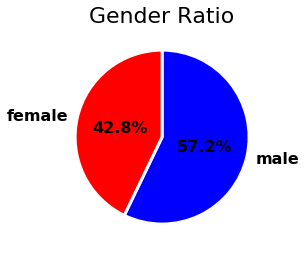

In [2]:
import numpy as np
import matplotlib.pyplot as plt

y=saitama_data["npatients"].sum()
print(y)
ma=saitama_data["male"].sum()
print(ma)
fe=saitama_data["female"].sum()
print(fe)
label=["male","female"]
color=["blue","red"]
d=np.array([ma,fe])
plt.title("Gender Ratio",fontsize = 22)
plt.rcParams['font.size'] = 16.0
plt.pie(d,labels=label,counterclock=False, startangle=90,wedgeprops={'linewidth': 3, 'edgecolor':"white"},colors=color,labeldistance=1.1,pctdistance=0.5,
        textprops={'color': "black", 'weight': "bold"},autopct="%1.1f%%")

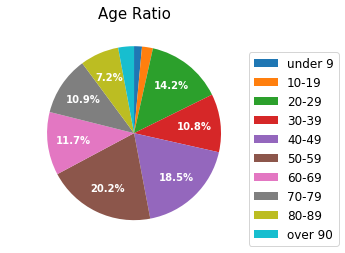

In [59]:
import numpy as np
import matplotlib.pyplot as plt
u5=saitama_data["u5"].sum()
u9=saitama_data["u9"].sum()+u5
s10=saitama_data["10s"].sum()
s20=saitama_data["20s"].sum()
s30=saitama_data["30s"].sum()
s40=saitama_data["40s"].sum()
s50=saitama_data["50s"].sum()
s60=saitama_data["60s"].sum()
s70=saitama_data["70s"].sum()
s80=saitama_data["80s"].sum()
o100=saitama_data["o100"].sum()
o90=saitama_data["90s"].sum()+o100

age_list=np.array([u9,s10,s20,s30,s40,s50,s60,s70,s80,o90])
label=["under 9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","over 90"]
plt.title("Age Ratio",fontsize = 15)
plt.rcParams['font.size'] = 10.0
plt.pie(age_list,labels=label,counterclock=False, startangle=90,labeldistance=1.1,pctdistance=0.7,
        textprops={'color': "white", 'weight': "bold"},autopct=lambda p: '{:.1f}%'.format(p) if p >= 3 else '')
plt.legend(label, fontsize=12,bbox_to_anchor=(1, 0.9)) 